In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

#데이터 준비
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

#학습 모델 준비
X = tf.placeholder(tf.float32, [None, 784], "X")
Y = tf.placeholder(tf.float32, [None, nb_classes], "Y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([784, nb_classes * 10]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([nb_classes * 10]), name="bias_1")
    layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)
    
    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)
    
with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([nb_classes * 10, nb_classes]), "weight_2")
    b2 = tf.Variable(tf.random_normal([nb_classes]), "bias_2")
    hypothesis = tf.nn.softmax(tf.matmul(layer1, W2) + b2)
    
    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)


with tf.name_scope("Cost"):
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
    tf.summary.scalar("Cost", cost)
with tf.name_scope("Train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=3e-1).minimize(cost)


#모델 성능 평가 준비

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))
tf.summary.scalar("Accuracy", accuracy)

#파라미터
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/MNIST_wide_and_deep")
    writer.add_graph(sess.graph)  # Show the graph4
    sess.run(tf.global_variables_initializer())
   
    #학습 사이클
    for epoch in range(num_epochs):
        avg_cost = 0;
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
            writer.add_summary(summary, global_step=i)
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
    print("Learning finished")

    #테스트 데이터로 모델 테스트
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}), )

    #1개 추출 , 예측
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}), )

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest", )
    plt.show()

"""
은닉층을 2개 늘리고

출력은 4배에서 2배 1배로 출력되도록 설계함

은닉층이 없을 때 0.1스텝으로 학습시켰을 때 정확도는 89퍼 정도 되었는데

wide and deep 설계한 후 정확도가 48~55퍼로 감소함.

스텝을 0.3까지 늘리니 68~77퍼로 증가하였지만 0.4스텝으로 늘렸을 때 다시 60퍼센트로 감소함.

출력을 10배 , 6배 , 1배로 설계하였더니

0.4스텝에서 78퍼~81퍼로 정확도가 올라감
0.1스텝에서 47퍼. underfitting.

신경망 볼륨이 올라갈 수 록 스텝도 늘려야 할 것 같다.

문제 발견. 활성함수로 시그모이드를 사용해서 배니싱그레디언트현상 때문

깊어질 수록 배니싱그레이언트 현상이 발생함.

은닉층 하나를 줄이고 10배 , 1배로 설계한 후 0.1스텝으로 학습 -> 정확도 86퍼센트

"""

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 0001, Cost: 1.890700853
Epoch: 0002, Cost: 1.346194338
Epoch: 0003, Cost: 1.110778347
Epoch: 0004, Cost: 0.964712243
Epoch: 0005, Cost: 0.883120232
Epoch: 0006, Cost: 0.83237

<Figure size 640x480 with 1 Axes>

'\n은닉층을 2개 늘리고\n\n출력은 4배에서 2배 1배로 출력되도록 설계함\n\n은닉층이 없을 때 0.1스텝으로 학습시켰을 때 정확도는 89퍼 정도 되었는데\n\nwide and deep 설계한 후 정확도가 48~55퍼로 감소함.\n\n스텝을 0.3까지 늘리니 68~77퍼로 증가하였지만 0.4스텝으로 늘렸을 때 다시 60퍼센트로 감소함.\n\n출력을 10배 , 6배 , 1배로 설계하였더니\n\n0.4스텝에서 78퍼~81퍼로 정확도가 올라감\n0.1스텝에서 47퍼. underfitting.\n\n신경망 볼륨이 올라갈 수 록 스텝도 늘려야 할 것 같다.\n\n문제 발견. 활성함수로 시그모이드를 사용해서 배니싱그레디언트현상 때문\n\n깊어질 수록 배니싱그레이언트 현상이 발생함.\n\n은닉층 하나를 줄이고 10배 , 1배로 설계한 후 0.1스텝으로 학습 -> 정확도 86퍼센트\n\n'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.826302672
Epoch: 0002, Cost: 1.061668952
Epoch: 0003, Cost: 0.838061315
Epoch: 0004, Cost: 0.733232745
Epoch: 0005, Cost: 0.669279885
Epoch: 0006, Cost: 0.624611836
Epoch: 0007, Cost: 0.591160344
Epoch: 0008, Cost: 0.563868987
Epoch: 0009, Cost: 0.541745171
Epoch: 0010, Cost: 0.522673578
Epoch: 0011, Cost: 0.506782325
Epoch: 0012, Cost: 0.492447643
Epoch: 0013, Cost: 0.479955837
Epoch: 0014, Cost: 0.468893674
Epoch: 0015, Cost: 0.458703488
Learning finished
Accuracy:  0.8951
Label:  [2]
Prediction:  [2]


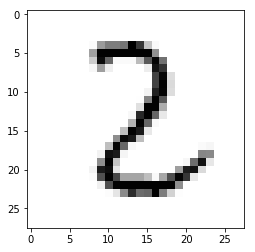

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.reset_default_graph()


#데이터 준비
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

#학습 모델 준비
X = tf.placeholder(tf.float32, [None, 784], "X")
Y = tf.placeholder(tf.float32, [None, nb_classes], "Y")

with tf.name_scope("Hypothesis"):
    W1 = tf.Variable(tf.random_normal([784, nb_classes]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([nb_classes]), name="bias_1")
    hypothesis = tf.nn.softmax(tf.matmul(X, W1) + b1)
    
    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Hypothesis", hypothesis)
    
with tf.name_scope("Cost"):
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
    tf.summary.scalar("Cost", cost)
with tf.name_scope("Train"):
    train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(cost)


#모델 성능 평가 준비

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))
tf.summary.scalar("Accuracy", accuracy)

#파라미터
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/MNIST_base_5")
    writer.add_graph(sess.graph)  # Show the graph4
    sess.run(tf.global_variables_initializer())
   
    #학습 사이클
    for epoch in range(num_epochs):
        avg_cost = 0;
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
    print("Learning finished")

    #테스트 데이터로 모델 테스트
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}), )

    #1개 추출 , 예측
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}), )

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation="nearest", )
    plt.show()
    
